In [1]:
# !pip install dask[complete]

**DATA ACQUISITION**

In [4]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from dask.distributed import Client
import time 
from sklearn.preprocessing import PolynomialFeatures, StandardScaler 
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error, r2_score 

In [5]:
# Loading both CSV files
df1 = pd.read_csv("Trips_by_Distance.csv")
df2 = pd.read_csv("Trips_Full Data.csv")

**DATA PRE -PROCESSING**

In [9]:
df1.head()

,Level,Date,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,...,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID,Week,Month
0,National,1/1/2019,NaN,NaN,NaN,NaN,77433867.0,248733553.0,8.977844e+08,241667151.0,...,129670778.0,116904343.0,40432062.0,15686639.0,7525563.0,1806022.0,1728112.0,00-00000-20190101,0,1
1,National,1/2/2019,NaN,NaN,NaN,NaN,61305201.0,264862219.0,1.139452e+09,291276735.0,...,171637514.0,167412698.0,56148976.0,17739183.0,7817044.0,1962301.0,1531219.0,00-00000-20190102,0,1
2,National,1/3/2019,NaN,NaN,NaN,NaN,63050480.0,263116940.0,1.162753e+09,296375014.0,...,175775410.0,172027487.0,57632422.0,18366626.0,8124548.0,2038099.0,1567072.0,00-00000-20190103,0,1
3,National,1/4/2019,NaN,NaN,NaN,NaN,61803652.0,264363768.0,1.181954e+09,293159631.0,...,181324645.0,176144493.0,58761592.0,19315785.0,8687318.0,2096065.0,1569185.0,00-00000-20190104,0,1
4,National,1/5/2019,NaN,NaN,NaN,NaN,64389745.0,261777675.0,1.180477e+09,295459014.0,...,180941769.0,165239790.0,54842134.0,19363939.0,8490791.0,1991159.0,1438664.0,00-00000-20190105,0,1


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Level                           1048575 non-null  object 
 1   Date                            1048575 non-null  object 
 2   State FIPS                      1047674 non-null  float64
 3   State Postal Code               1047674 non-null  object 
 4   County FIPS                     1001723 non-null  float64
 5   County Name                     1001723 non-null  object 
 6   Population Staying at Home      1035625 non-null  float64
 7   Population Not Staying at Home  1035625 non-null  float64
 8   Number of Trips                 1035625 non-null  float64
 9   Number of Trips <1              1035625 non-null  float64
 10  Number of Trips 1-3             1035625 non-null  float64
 11  Number of Trips 3-5             1035625 non-null  float64
 12  

In [13]:
df2.head()

,Month of Date,Week of Date,Year of Date,Level,Date,Week Ending Date,Trips <1 Mile,People Not Staying at Home,Population Staying at Home,Trips,...,Trips 10-25 Miles,Trips 100-250 Miles,Trips 100+ Miles,Trips 25-100 Miles,Trips 25-50 Miles,Trips 250-500 Miles,Trips 3-5 Miles,Trips 5-10 Miles,Trips 50-100 Miles,Trips 500+ Miles
0,August,Week 32,2019,National,8/4/2019 0:00,10-Aug-19,292959749,258404133,67763287,1322685497,...,200922270,8595827,15338786,79429125,59517188,2273613,171336406,216121882,19911937,4469346
1,August,Week 32,2019,National,8/5/2019 0:00,10-Aug-19,317133861,262199758,63967662,1412564488,...,228809869,6535920,12563068,86004297,68184743,1941260,178996059,231048425,17819554,4085888
2,August,Week 32,2019,National,8/6/2019 0:00,10-Aug-19,324443205,260096133,66071287,1437762102,...,235621127,5993704,11104823,87599579,70149166,1741994,179210645,233248732,17450413,3369125
3,August,Week 32,2019,National,8/7/2019 0:00,10-Aug-19,358483024,258878802,67288618,1543710309,...,249988663,5379881,8528574,92200386,74381367,1272248,189163336,243872277,17819019,1876445
4,August,Week 32,2019,National,8/8/2019 0:00,10-Aug-19,300765870,262410045,63757375,1382044815,...,226055368,6259735,12892348,84193587,66724543,1957888,179346163,230933709,17469044,4674725


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Month of Date               7 non-null      object
 1   Week of Date                7 non-null      object
 2   Year of Date                7 non-null      int64 
 3   Level                       7 non-null      object
 4   Date                        7 non-null      object
 5   Week Ending Date            7 non-null      object
 6   Trips <1 Mile               7 non-null      int64 
 7   People Not Staying at Home  7 non-null      int64 
 8   Population Staying at Home  7 non-null      int64 
 9   Trips                       7 non-null      int64 
 10  Trips 1-25 Miles            7 non-null      int64 
 11  Trips 1-3 Miles             7 non-null      int64 
 12  Trips 10-25 Miles           7 non-null      int64 
 13  Trips 100-250 Miles         7 non-null      int64 
 14

In [17]:
df1.columns

Index(['Level', 'Date', 'State FIPS', 'State Postal Code', 'County FIPS',
       'County Name', 'Population Staying at Home',
       'Population Not Staying at Home', 'Number of Trips',
       'Number of Trips <1', 'Number of Trips 1-3', 'Number of Trips 3-5',
       'Number of Trips 5-10', 'Number of Trips 10-25',
       'Number of Trips 25-50', 'Number of Trips 50-100',
       'Number of Trips 100-250', 'Number of Trips 250-500',
       'Number of Trips >=500', 'Row ID', 'Week', 'Month'],
      dtype='object')

In [19]:
df2.columns

Index(['Month of Date', 'Week of Date', 'Year of Date', 'Level', 'Date',
       'Week Ending Date', 'Trips <1 Mile', 'People Not Staying at Home',
       'Population Staying at Home', 'Trips', 'Trips 1-25 Miles',
       'Trips 1-3 Miles', 'Trips 10-25 Miles', 'Trips 100-250 Miles',
       'Trips 100+ Miles', 'Trips 25-100 Miles', 'Trips 25-50 Miles',
       'Trips 250-500 Miles', 'Trips 3-5 Miles', 'Trips 5-10 Miles',
       'Trips 50-100 Miles', 'Trips 500+ Miles'],
      dtype='object')

In [21]:
df1.Level.value_counts()

Level
County      1001723
State         45951
National        901
Name: count, dtype: int64

In [23]:
df1['State Postal Code'].value_counts()

State Postal Code
TX    81859
GA    51623
VA    43314
KY    39181
MO    37527
KS    34408
IL    33439
NC    32732
IA    32523
TN    31202
NE    30569
IN    30249
OH    28962
MN    28606
MI    27355
MS    27027
OK    25426
AR    24829
WI    23856
AL    22256
FL    22243
PA    22231
SD    21929
CO    21328
LA    21287
NY    20661
CA    19363
MT    18804
WV    18410
ND    17842
SC    15574
ID    14937
WA    13339
OR    12385
NM    11435
AK    10169
UT    10126
MD     8546
WY     8238
NJ     7600
NV     6308
ME     6005
AZ     5675
VT     5353
MA     5353
NH     4084
CT     3445
HI     2496
RI     2491
DE     1855
DC     1219
Name: count, dtype: int64

In [25]:
df1['County Name'].value_counts()

County Name
Washington County    9560
Jefferson County     7973
Franklin County      7652
Jackson County       7336
Lincoln County       7334
                     ... 
Sanpete County        318
Tooele County         318
Uintah County         318
Nuckolls County       318
Bandera County        318
Name: count, Length: 1877, dtype: int64

In [27]:
df1.describe()

,State FIPS,County FIPS,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Week,Month
count,1.047674e+06,1.001723e+06,1.035625e+06,1.035625e+06,1.035625e+06,1.035625e+06,1.035625e+06,1.035625e+06,1.035625e+06,1.035625e+06,1.035625e+06,1.035625e+06,1.035625e+06,1.035625e+06,1.035625e+06,1.048575e+06,1.048575e+06
mean,3.021900e+01,3.038029e+04,1.462917e+05,5.234714e+05,2.477794e+06,6.120798e+05,6.191970e+05,3.040894e+05,3.843100e+05,3.759380e+05,1.208128e+05,3.884712e+04,1.582453e+04,3.553210e+03,3.142248e+03,2.171479e+01,5.575419e+00
std,1.516822e+01,1.516011e+04,2.225797e+06,7.649900e+06,3.618162e+07,9.003866e+06,9.022217e+06,4.437764e+06,5.615742e+06,5.502116e+06,1.765528e+06,5.753918e+05,2.404323e+05,5.346122e+04,5.069772e+04,1.242963e+01,2.847674e+00
min,1.000000e+00,1.001000e+03,8.000000e+00,8.700000e+01,2.200000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,1.800000e+01,1.817700e+04,2.079000e+03,9.793000e+03,4.978400e+04,1.048600e+04,1.138400e+04,4.794000e+03,6.463000e+03,8.001000e+03,3.860000e+03,1.240000e+03,3.630000e+02,5.800000e+01,2.700000e+01,1.100000e+01,3.000000e+00
50%,2.900000e+01,2.917500e+04,5.018000e+03,2.347400e+04,1.208760e+05,2.564200e+04,3.065800e+04,1.392300e+04,1.699900e+04,1.934500e+04,8.387000e+03,2.717000e+03,8.570000e+02,1.730000e+02,9.800000e+01,2.300000e+01,6.000000e+00
75%,4.500000e+01,4.508100e+04,1.595000e+04,7.131800e+04,3.603300e+05,7.775300e+04,9.619700e+04,4.621900e+04,5.446900e+04,5.515100e+04,2.109600e+04,6.679000e+03,2.372000e+03,5.330000e+02,4.260000e+02,3.200000e+01,8.000000e+00
max,5.600000e+01,5.604500e+04,1.102118e+08,2.737400e+08,1.569053e+09,4.227002e+08,4.051305e+08,1.980184e+08,2.526118e+08,2.565096e+08,7.636732e+07,2.873561e+07,1.447698e+07,3.651375e+06,5.003062e+06,5.200000e+01,1.200000e+01


In [29]:
df2.Level.value_counts()

Level
National    7
Name: count, dtype: int64

In [31]:
df2['Month of Date'].value_counts()

Month of Date
August    7
Name: count, dtype: int64

In [33]:
df2['Week of Date'].value_counts()

Week of Date
Week 32    7
Name: count, dtype: int64

In [35]:
df2['Year of Date'].value_counts()

Year of Date
2019    7
Name: count, dtype: int64

In [37]:
df2.describe()

,Year of Date,Trips <1 Mile,People Not Staying at Home,Population Staying at Home,Trips,Trips 1-25 Miles,Trips 1-3 Miles,Trips 10-25 Miles,Trips 100-250 Miles,Trips 100+ Miles,Trips 25-100 Miles,Trips 25-50 Miles,Trips 250-500 Miles,Trips 3-5 Miles,Trips 5-10 Miles,Trips 50-100 Miles,Trips 500+ Miles
count,7.0,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00
mean,2019.0,3.259764e+08,2.631041e+08,6.306337e+07,1.441692e+09,1.015555e+09,3.694767e+08,2.310785e+08,6.850130e+06,1.212247e+07,8.803745e+07,6.915913e+07,1.829242e+06,1.815558e+08,2.334445e+08,1.887832e+07,3.443101e+06
std,0.0,2.424507e+07,5.029890e+06,5.029890e+06,7.644026e+07,4.935492e+07,2.061755e+07,1.595993e+07,1.117810e+06,2.045473e+06,5.376956e+06,5.147182e+06,3.015761e+05,6.145471e+06,9.185330e+06,1.595080e+06,1.019597e+06
min,2019.0,2.929597e+08,2.584041e+08,5.406600e+07,1.322685e+09,9.349578e+08,3.465773e+08,2.009223e+08,5.379881e+06,8.528574e+06,7.942912e+07,5.951719e+07,1.272248e+06,1.713364e+08,2.161219e+08,1.745041e+07,1.876445e+06
25%,2019.0,3.089499e+08,2.594875e+08,6.114337e+07,1.397305e+09,9.905281e+08,3.529333e+08,2.274326e+08,6.126720e+06,1.163900e+07,8.509894e+07,6.745464e+07,1.768012e+06,1.791034e+08,2.309911e+08,1.764403e+07,2.813090e+06
50%,2019.0,3.244432e+08,2.621998e+08,6.396766e+07,1.437762e+09,1.014614e+09,3.665340e+08,2.305803e+08,6.535920e+06,1.225654e+07,8.759958e+07,7.014917e+07,1.823661e+06,1.793462e+08,2.332487e+08,1.781955e+07,3.369125e+06
75%,2019.0,3.440244e+08,2.650241e+08,6.667995e+07,1.496538e+09,1.046881e+09,3.829423e+08,2.405966e+08,7.592922e+06,1.272771e+07,9.201497e+07,7.251285e+07,1.949574e+06,1.864191e+08,2.394431e+08,2.020250e+07,4.277617e+06
max,2019.0,3.584830e+08,2.721014e+08,6.776329e+07,1.543710e+09,1.084498e+09,4.014740e+08,2.499887e+08,8.595827e+06,1.533879e+07,9.500565e+07,7.451258e+07,2.273613e+06,1.891633e+08,2.438723e+08,2.118523e+07,4.674725e+06


**DATA CLEANING**

In [40]:
df1.duplicated().sum()

0

In [42]:
df2.duplicated().sum()

0

In [44]:
df1.isnull().sum(axis=0) 

Level                                 0
Date                                  0
State FIPS                          901
State Postal Code                   901
County FIPS                       46852
County Name                       46852
Population Staying at Home        12950
Population Not Staying at Home    12950
Number of Trips                   12950
Number of Trips <1                12950
Number of Trips 1-3               12950
Number of Trips 3-5               12950
Number of Trips 5-10              12950
Number of Trips 10-25             12950
Number of Trips 25-50             12950
Number of Trips 50-100            12950
Number of Trips 100-250           12950
Number of Trips 250-500           12950
Number of Trips >=500             12950
Row ID                                0
Week                                  0
Month                                 0
dtype: int64

In [46]:
df1.isnull().sum(axis=1) 

0          4
1          4
2          4
3          4
4          4
          ..
1048570    0
1048571    0
1048572    0
1048573    0
1048574    0
Length: 1048575, dtype: int64

Handle Missing Values 

In [49]:
df1.dropna(how='all',inplace=True) 

In [51]:
# Filling missing numerical values with 0
df1.fillna(0, inplace=True)
df2.fillna(0, inplace=True)

In [53]:
# Remove duplicates
df1.drop_duplicates(inplace=True)
df2.drop_duplicates(inplace=True)

In [55]:
# Standardize Column Names (lowercase, replace spaces with underscores)
df1.columns = df1.columns.str.lower().str.replace(' ', '_')
df2.columns = df2.columns.str.lower().str.replace(' ', '_')

In [57]:
# remove unwanted columns
df1 = df1.drop('row_id',axis=1)
df1.head()

,level,date,state_fips,state_postal_code,county_fips,county_name,population_staying_at_home,population_not_staying_at_home,number_of_trips,number_of_trips_<1,...,number_of_trips_3-5,number_of_trips_5-10,number_of_trips_10-25,number_of_trips_25-50,number_of_trips_50-100,number_of_trips_100-250,number_of_trips_250-500,number_of_trips_>=500,week,month
0,National,1/1/2019,0.0,0,0.0,0,77433867.0,248733553.0,8.977844e+08,241667151.0,...,108078903.0,129670778.0,116904343.0,40432062.0,15686639.0,7525563.0,1806022.0,1728112.0,0,1
1,National,1/2/2019,0.0,0,0.0,0,61305201.0,264862219.0,1.139452e+09,291276735.0,...,138039296.0,171637514.0,167412698.0,56148976.0,17739183.0,7817044.0,1962301.0,1531219.0,0,1
2,National,1/3/2019,0.0,0,0.0,0,63050480.0,263116940.0,1.162753e+09,296375014.0,...,140771581.0,175775410.0,172027487.0,57632422.0,18366626.0,8124548.0,2038099.0,1567072.0,0,1
3,National,1/4/2019,0.0,0,0.0,0,61803652.0,264363768.0,1.181954e+09,293159631.0,...,145251819.0,181324645.0,176144493.0,58761592.0,19315785.0,8687318.0,2096065.0,1569185.0,0,1
4,National,1/5/2019,0.0,0,0.0,0,64389745.0,261777675.0,1.180477e+09,295459014.0,...,148540651.0,180941769.0,165239790.0,54842134.0,19363939.0,8490791.0,1991159.0,1438664.0,0,1


In [59]:
df1.select_dtypes(include=['object']).columns

Index(['level', 'date', 'state_postal_code', 'county_name'], dtype='object')

In [61]:
df2.select_dtypes(include=['object']).columns

Index(['month_of_date', 'week_of_date', 'level', 'date', 'week_ending_date'], dtype='object')

In [65]:
# Convert date columns to datetime format
df1['date'] = pd.to_datetime(df1['date'])
df2['date'] = pd.to_datetime(df2['date'])
df2['week_ending_date'] = pd.to_datetime(df2['week_ending_date']


SyntaxError: incomplete input (2439446804.py, line 4)

In [67]:
# Convert text data into numeric (using categorical codes)

In [69]:
df1['level'].head()

0    National
1    National
2    National
3    National
4    National
Name: level, dtype: object

In [71]:
df1.level.value_counts()

level
County      1001723
State         45951
National        901
Name: count, dtype: int64

In [73]:
df1.level = pd.Categorical(df1.level,['County','State','National']).codes
df1.level.value_counts()

level
0    1001723
1      45951
2        901
Name: count, dtype: int64

In [75]:
df1.state_postal_code.unique()

array([0, 'NV', 'FL', 'DC', 'DE', 'CT', 'CO', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'AL', 'ID', 'IL',
       'IN', 'IA', 'SD', 'GA', 'KS', 'KY', 'LA', 'AZ', 'AR', 'CA', 'AK',
       'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'MD', 'MA',
       'ME', 'HI', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE'], dtype=object)

In [77]:
df1.state_postal_code.unique()[1:] # avoiding nan data

array(['NV', 'FL', 'DC', 'DE', 'CT', 'CO', 'NH', 'NJ', 'NM', 'NY', 'NC',
       'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'AL', 'ID', 'IL', 'IN',
       'IA', 'SD', 'GA', 'KS', 'KY', 'LA', 'AZ', 'AR', 'CA', 'AK', 'TN',
       'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'MD', 'MA', 'ME',
       'HI', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE'], dtype=object)

In [81]:
df1.state_postal_code = pd.Categorical(df1.state_postal_code,df1.state_postal_code.unique()[1:]).codes 
df1.state_postal_code.value_counts().head()

state_postal_code
33    81859
24    51623
36    43314
26    39181
48    37527
Name: count, dtype: int64

In [83]:
df1.county_name.unique()[1:]

array(['Weston County', 'Bradley County', 'Calhoun County', ...,
       'Ransom County', 'Rolette County', 'Sargent County'], dtype=object)

In [85]:
df1.county_name = pd.Categorical(df1.county_name,df1.county_name.unique()[1:]).codes
df1.county_name.value_counts().head()

county_name
-1      46852
 143     9560
 64      7973
 19      7652
 29      7336
Name: count, dtype: int64

In [87]:
df2.month_of_date.unique()

array(['August'], dtype=object)

In [89]:
df2.month_of_date = pd.Categorical(df2.month_of_date,['August']).codes
df2.month_of_date.value_counts().head()

month_of_date
0    7
Name: count, dtype: int64

In [91]:
df2.level.unique()

array(['National'], dtype=object)

In [93]:
df2.level = pd.Categorical(df2.level,['National']).codes
df2.level.value_counts()

level
0    7
Name: count, dtype: int64

In [95]:
df2.week_of_date.unique()

array(['Week 32'], dtype=object)

In [97]:
df2.week_of_date = pd.Categorical(df2.week_of_date,['Week 32']).codes
df2.week_of_date.value_counts()

week_of_date
0    7
Name: count, dtype: int64

In [99]:
df1.head()

,level,date,state_fips,state_postal_code,county_fips,county_name,population_staying_at_home,population_not_staying_at_home,number_of_trips,number_of_trips_<1,...,number_of_trips_3-5,number_of_trips_5-10,number_of_trips_10-25,number_of_trips_25-50,number_of_trips_50-100,number_of_trips_100-250,number_of_trips_250-500,number_of_trips_>=500,week,month
0,2,2019-01-01,0.0,-1,0.0,-1,77433867.0,248733553.0,8.977844e+08,241667151.0,...,108078903.0,129670778.0,116904343.0,40432062.0,15686639.0,7525563.0,1806022.0,1728112.0,0,1
1,2,2019-01-02,0.0,-1,0.0,-1,61305201.0,264862219.0,1.139452e+09,291276735.0,...,138039296.0,171637514.0,167412698.0,56148976.0,17739183.0,7817044.0,1962301.0,1531219.0,0,1
2,2,2019-01-03,0.0,-1,0.0,-1,63050480.0,263116940.0,1.162753e+09,296375014.0,...,140771581.0,175775410.0,172027487.0,57632422.0,18366626.0,8124548.0,2038099.0,1567072.0,0,1
3,2,2019-01-04,0.0,-1,0.0,-1,61803652.0,264363768.0,1.181954e+09,293159631.0,...,145251819.0,181324645.0,176144493.0,58761592.0,19315785.0,8687318.0,2096065.0,1569185.0,0,1
4,2,2019-01-05,0.0,-1,0.0,-1,64389745.0,261777675.0,1.180477e+09,295459014.0,...,148540651.0,180941769.0,165239790.0,54842134.0,19363939.0,8490791.0,1991159.0,1438664.0,0,1


In [101]:
df1.dtypes

level                                       int8
date                              datetime64[ns]
state_fips                               float64
state_postal_code                           int8
county_fips                              float64
county_name                                int16
population_staying_at_home               float64
population_not_staying_at_home           float64
number_of_trips                          float64
number_of_trips_<1                       float64
number_of_trips_1-3                      float64
number_of_trips_3-5                      float64
number_of_trips_5-10                     float64
number_of_trips_10-25                    float64
number_of_trips_25-50                    float64
number_of_trips_50-100                   float64
number_of_trips_100-250                  float64
number_of_trips_250-500                  float64
number_of_trips_>=500                    float64
week                                       int64
month               

In [103]:
df2.head()

,month_of_date,week_of_date,year_of_date,level,date,week_ending_date,trips_<1_mile,people_not_staying_at_home,population_staying_at_home,trips,...,trips_10-25_miles,trips_100-250_miles,trips_100+_miles,trips_25-100_miles,trips_25-50_miles,trips_250-500_miles,trips_3-5_miles,trips_5-10_miles,trips_50-100_miles,trips_500+_miles
0,0,0,2019,0,2019-08-04,2019-08-10,292959749,258404133,67763287,1322685497,...,200922270,8595827,15338786,79429125,59517188,2273613,171336406,216121882,19911937,4469346
1,0,0,2019,0,2019-08-05,2019-08-10,317133861,262199758,63967662,1412564488,...,228809869,6535920,12563068,86004297,68184743,1941260,178996059,231048425,17819554,4085888
2,0,0,2019,0,2019-08-06,2019-08-10,324443205,260096133,66071287,1437762102,...,235621127,5993704,11104823,87599579,70149166,1741994,179210645,233248732,17450413,3369125
3,0,0,2019,0,2019-08-07,2019-08-10,358483024,258878802,67288618,1543710309,...,249988663,5379881,8528574,92200386,74381367,1272248,189163336,243872277,17819019,1876445
4,0,0,2019,0,2019-08-08,2019-08-10,300765870,262410045,63757375,1382044815,...,226055368,6259735,12892348,84193587,66724543,1957888,179346163,230933709,17469044,4674725


In [105]:
df2.dtypes

month_of_date                           int8
week_of_date                            int8
year_of_date                           int64
level                                   int8
date                          datetime64[ns]
week_ending_date              datetime64[ns]
trips_<1_mile                          int64
people_not_staying_at_home             int64
population_staying_at_home             int64
trips                                  int64
trips_1-25_miles                       int64
trips_1-3_miles                        int64
trips_10-25_miles                      int64
trips_100-250_miles                    int64
trips_100+_miles                       int64
trips_25-100_miles                     int64
trips_25-50_miles                      int64
trips_250-500_miles                    int64
trips_3-5_miles                        int64
trips_5-10_miles                       int64
trips_50-100_miles                     int64
trips_500+_miles                       int64
dtype: obj

**DATA CATEGORIZATION**

In [108]:
# Categorizing trips based on distance
categorized_by_distance = pd.DataFrame()
categorized_by_distance['date'] = df2[['date']]
categorized_by_distance['Short_distance_trips'] = df2[['trips_<1_mile', 'trips_1-3_miles', 'trips_3-5_miles', 'trips_5-10_miles']].sum(axis=1)
categorized_by_distance['Medium_distance_trips'] = df2[['trips_10-25_miles', 'trips_25-50_miles', 'trips_5-10_miles']].sum(axis=1)
categorized_by_distance['Long_distance_trips'] = df2[['trips_100-250_miles', 'trips_250-500_miles', 'trips_500+_miles']].sum(axis=1)
categorized_by_distance

,date,Short_distance_trips,Medium_distance_trips,Long_distance_trips
0,2019-08-04,1026995316,476561340,15338786
1,2019-08-05,1085187254,528043037,12563068
2,2019-08-06,1103436573,539019025,11104823
3,2019-08-07,1192992686,568242307,8528574
4,2019-08-08,1058903512,523713620,12892348
5,2019-08-09,1148737678,562112248,12256537
6,2019-08-10,1156920199,538083168,12173176


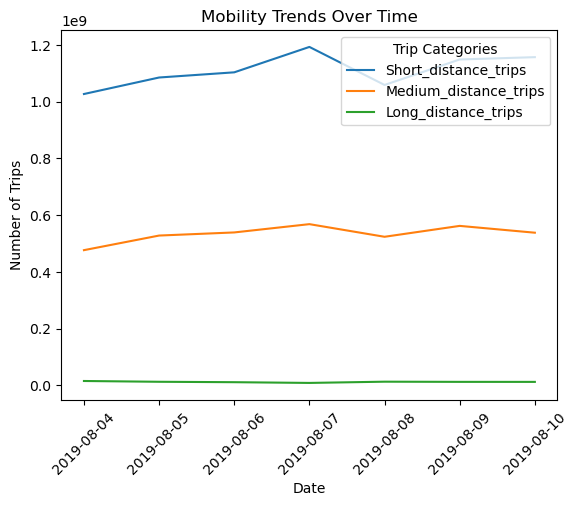

In [110]:
plt.plot(categorized_by_distance['date'], categorized_by_distance['Short_distance_trips'], label='Short_distance_trips')
plt.plot(categorized_by_distance['date'], categorized_by_distance['Medium_distance_trips'], label='Medium_distance_trips')
plt.plot(categorized_by_distance['date'], categorized_by_distance['Long_distance_trips'], label='Long_distance_trips')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.title('Mobility Trends Over Time')
plt.xticks(rotation=45)
plt.legend(title='Trip Categories') 
plt.show() 

In [112]:
# Categorizing based on population 
categorized_by_population = pd.DataFrame()
categorized_by_population['date'] = df2[['date']]
categorized_by_population['People_Staying_at_Home'] = df2['population_staying_at_home']
categorized_by_population['People_Traveling'] = df2['people_not_staying_at_home']
categorized_by_population

,date,People_Staying_at_Home,People_Traveling
0,2019-08-04,67763287,258404133
1,2019-08-05,63967662,262199758
2,2019-08-06,66071287,260096133
3,2019-08-07,67288618,258878802
4,2019-08-08,63757375,262410045
5,2019-08-09,54066003,272101417
6,2019-08-10,58529356,267638064


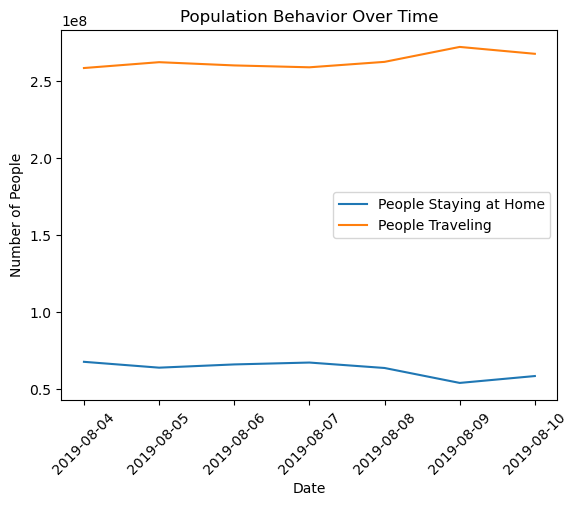

In [114]:
# Plotting 
plt.plot(categorized_by_population['date'], categorized_by_population['People_Staying_at_Home'], label='People Staying at Home')
plt.plot(categorized_by_population['date'], categorized_by_population['People_Traveling'], label='People Traveling')
plt.xlabel('Date')
plt.ylabel('Number of People')
plt.title('Population Behavior Over Time')
plt.xticks(rotation=45)
plt.legend() 
plt.show()

**DATA ANALYSIS**

**#QUESTION 1.a**

In [120]:
total_staying_home = df1["population_staying_at_home"].sum()
print("Total people staying at home:", total_staying_home)

Total people staying at home: 151503311490.0


In [122]:
total_trips = df1.iloc[:, 9:19].sum() # getting all rows as trip columns
print("Total trips by distance category:\n", total_trips)

Total trips by distance category:
 number_of_trips_<1         6.338851e+11
number_of_trips_1-3        6.412559e+11
number_of_trips_3-5        3.149226e+11
number_of_trips_5-10       3.980011e+11
number_of_trips_10-25      3.893308e+11
number_of_trips_25-50      1.251168e+11
number_of_trips_50-100     4.023105e+10
number_of_trips_100-250    1.638828e+10
number_of_trips_250-500    3.679793e+09
number_of_trips_>=500      3.254191e+09
dtype: float64


In [124]:
# Count unique weeks
num_weeks = df1['week'].unique()
print("Total unique weeks:", num_weeks)

# Group by 'week' and find the average number of people staying at home
avg_people_staying_home = df1.groupby('week')['population_staying_at_home'].mean()

print("Average number of people staying home per week:\n", avg_people_staying_home)

Total unique weeks: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52]
Average number of people staying home per week:
 week
0     1.199202e+05
1     1.504254e+05
2     1.488433e+05
3     1.461858e+05
4     1.460956e+05
5     1.444647e+05
6     1.430626e+05
7     1.463825e+05
8     1.385760e+05
9     1.384294e+05
10    1.388649e+05
11    1.531764e+05
12    1.555268e+05
13    1.574559e+05
14    1.575399e+05
15    1.586471e+05
16    1.540430e+05
17    1.537818e+05
18    1.536102e+05
19    1.480467e+05
20    1.413530e+05
21    1.490569e+05
22    1.475433e+05
23    8.536271e+04
24    8.624407e+04
25    1.042980e+05
26    1.093380e+05
27    1.070431e+05
28    1.073070e+05
29    1.113248e+05
30    1.100773e+05
31    1.081441e+05
32    1.026508e+05
33    1.022363e+05
34    1.060031e+05
35    1.103829e+05
36    1.107614e+05
37    1.104032e+05
38    1.098623e+05
39    1.110079e+05
40 

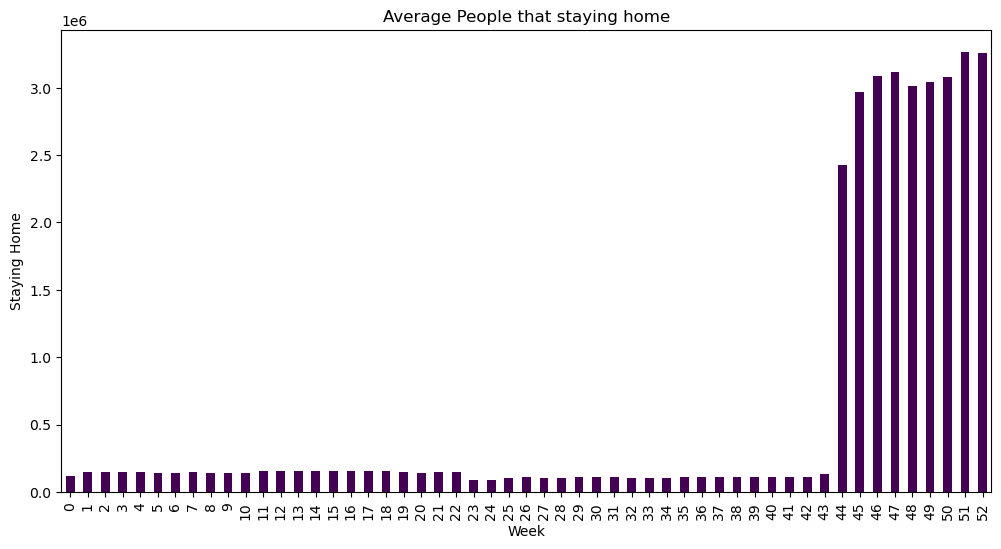

In [126]:
plt.figure(figsize=(12, 6))
avg_people_staying_home.plot(kind="bar", stacked=True, colormap="viridis", figsize=(12, 6))
plt.xlabel("Week")
plt.ylabel("Staying Home")
plt.title("Average People that staying home") 
plt.show()

In [128]:
# Group by 'week' and get the average trips in each distance category
avg_travel_distances = df1.groupby('week')[['number_of_trips_10-25', 'number_of_trips_25-50', 'number_of_trips_50-100',
                                        'number_of_trips_100-250', 'number_of_trips_250-500', 'number_of_trips_>=500']].mean()

print("Average travel distances per week:\n", avg_travel_distances)


Average travel distances per week:
       number_of_trips_10-25  number_of_trips_25-50  number_of_trips_50-100  \
week                                                                         
0              2.580315e+05           8.602491e+04            29798.574684   
1              3.390968e+05           1.116959e+05            36217.197826   
2              3.419069e+05           1.123393e+05            36350.779953   
3              3.476412e+05           1.142916e+05            37716.223989   
4              3.439215e+05           1.125881e+05            36599.655592   
5              3.494641e+05           1.152327e+05            38206.542623   
6              3.588366e+05           1.188568e+05            40224.950748   
7              3.557185e+05           1.178702e+05            40241.878888   
8              3.724006e+05           1.218320e+05            40038.692194   
9              3.764328e+05           1.250544e+05            42383.983930   
10             3.870831e+05 

<Figure size 1200x600 with 0 Axes>

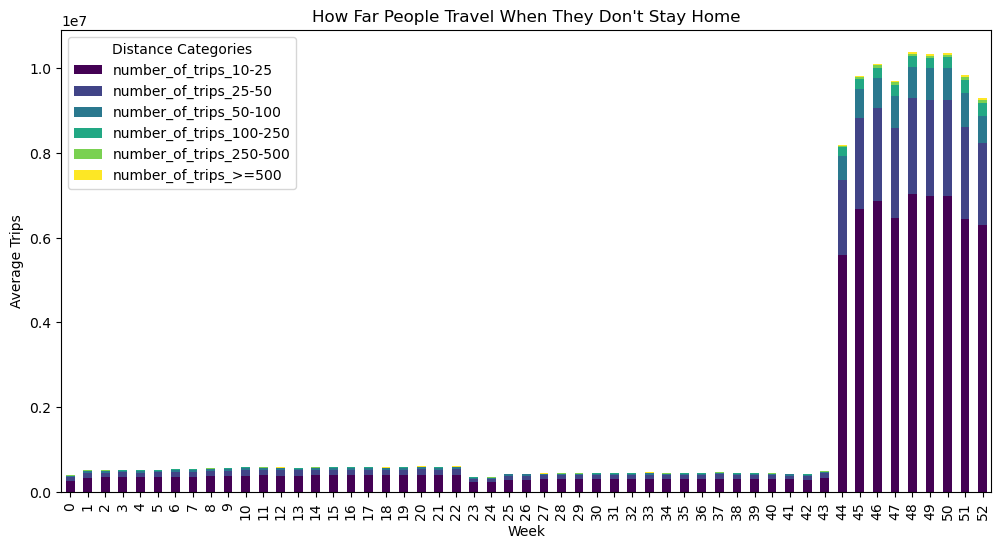

In [130]:
plt.figure(figsize=(12, 6))
avg_travel_distances.plot(kind="bar", stacked=True, colormap="viridis", figsize=(12, 6))
plt.xlabel("Week")
plt.ylabel("Average Trips")
plt.title("How Far People Travel When They Don't Stay Home")
plt.legend(title="Distance Categories")
plt.show()

**##QUESTION 1.b**

In [133]:
# Finding Dates for >10,000,000 People Taking 10-25 Trips
df_10_25 = df1[df1['number_of_trips_10-25'] > 10_000_000][['date', 'number_of_trips_10-25']]
print("Dates where >10M people took 10-25 trips:\n", df_10_25)

Dates where >10M people took 10-25 trips:
              date  number_of_trips_10-25
0      2019-01-01            116904343.0
1      2019-01-02            167412698.0
2      2019-01-03            172027487.0
3      2019-01-04            176144493.0
4      2019-01-05            165239790.0
...           ...                    ...
157189 2021-06-15            200549282.0
157190 2021-06-16            199082591.0
157191 2021-06-17            198280332.0
157192 2021-06-18            202609024.0
157193 2021-06-19            178997864.0

[3749 rows x 2 columns]


In [135]:
# Finding Dates for >10,000,000 People Taking 50-100 Trips

In [137]:
df_50_100 = df1[df1['number_of_trips_50-100'] > 10_000_000][['date', 'number_of_trips_50-100']] 
print("Dates where >10M people took 50-100 trips:\n", df_50_100)

Dates where >10M people took 50-100 trips:
              date  number_of_trips_50-100
0      2019-01-01              15686639.0
1      2019-01-02              17739183.0
2      2019-01-03              18366626.0
3      2019-01-04              19315785.0
4      2019-01-05              19363939.0
...           ...                     ...
157189 2021-06-15              19181256.0
157190 2021-06-16              19247409.0
157191 2021-06-17              19277452.0
157192 2021-06-18              22229709.0
157193 2021-06-19              24428623.0

[900 rows x 2 columns]


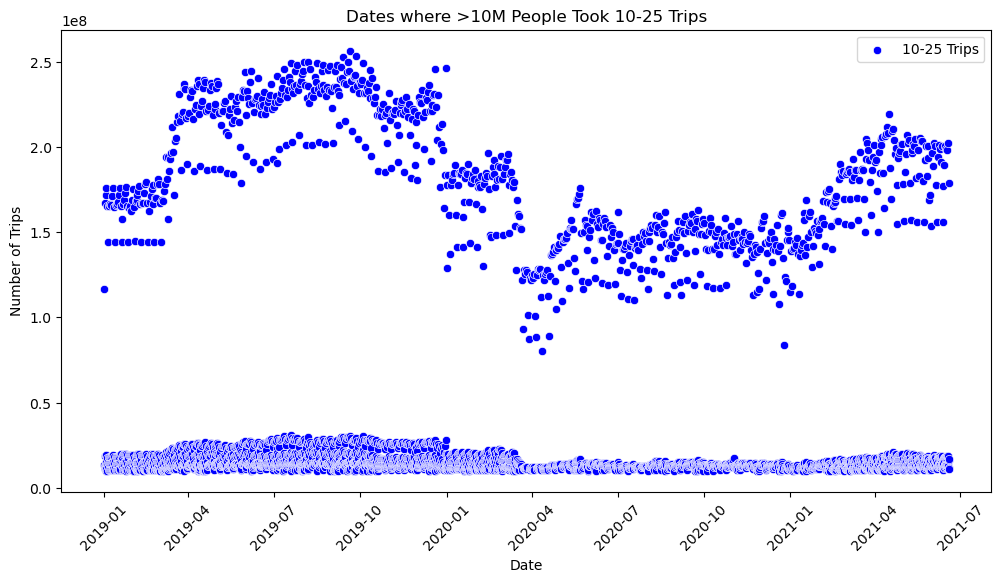

In [139]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_10_25['date'], y=df_10_25['number_of_trips_10-25'], color="blue", label="10-25 Trips")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.title("Dates where >10M People Took 10-25 Trips")
plt.legend()
plt.show()


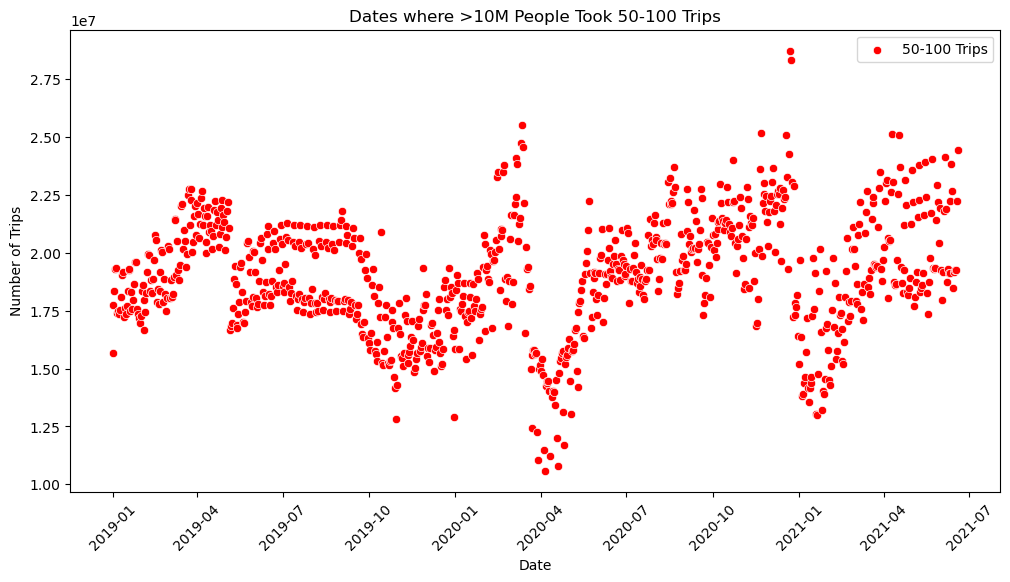

In [141]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_50_100['date'], y=df_50_100['number_of_trips_50-100'], color="red", label="50-100 Trips")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.title("Dates where >10M People Took 50-100 Trips")
plt.legend()
plt.show()


**###QUESTION 1.c**

In [144]:
# Loading time difference in sequential and parallel processing

In [146]:
start_time = time.time() 
df_pandass = pd.read_csv('Trips_by_Distance.csv') 
end_time = time.time()
s_diff = end_time - start_time
print(f"Pandas Loading Time: {s_diff} seconds")

Pandas Loading Time: 9.187842607498169 seconds


In [148]:
start_time = time.time() 
df_daskk = dd.read_csv("Trips_by_Distance.csv", assume_missing=True) 
end_time = time.time()
p_diff = end_time - start_time
print(f"Dask Loading Time: {p_diff} seconds")

Dask Loading Time: 0.3184065818786621 seconds


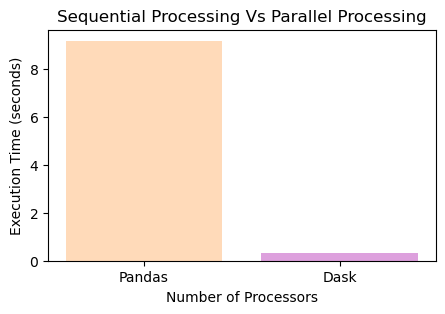

In [150]:
#Compare Execution Time
plt.figure(figsize=(5, 3))
plt.bar(['Pandas','Dask'],[s_diff,p_diff], color=['peachpuff', 'plum'])
plt.xlabel("Number of Processors")
plt.ylabel("Execution Time (seconds)")
plt.title("Sequential Processing Vs Parallel Processing")
# plt.xticks(['Pandas','Dask'])
plt.show()


In [152]:
# Sequential Processing (Pandas)
start = time.time()
total_trips_serial = df1.iloc[: , 9:19].sum()
end = time.time()
print("Time taken (Serial Processing):", end - start, "seconds")

Time taken (Serial Processing): 0.5636496543884277 seconds


In [154]:
# Parallel Processing (Dask, 10 processors)
# Convert Pandas dataframe to Dask dataframe
ddf10 = dd.from_pandas(df1, npartitions=10)  # Split into 10 parallel partitions
ddf10


start = time.time()
total_trips_parallel = ddf10.iloc[:, 9:19].sum().compute()
end = time.time()
print("Time taken (Parallel Processing, 10 CPUs):", end - start, "seconds")

Time taken (Parallel Processing, 10 CPUs): 0.47965550422668457 seconds


In [156]:
# Parallel Processing (Dask, 20 processors)
 
ddf20 = dd.from_pandas(df1, npartitions=20)  # Split into 20 parallel partitions
ddf20

start = time.time()
total_trips_parallel_20 = ddf20.iloc[:, 9:19].sum().compute()
end = time.time()
print("Time taken (Parallel Processing, 20 CPUs):", end - start, "seconds")

Time taken (Parallel Processing, 20 CPUs): 0.26828765869140625 seconds


In [ ]:
# Load 2nd dataset with Dask
df_dask = dd.read_csv("Trips_by_Distance.csv", assume_missing=True)


# Define number of processors
n_processors = [10, 20]
n_processors_time = {}  # Store execution times
for processor in n_processors:
    # Start Dask Client with specific number of workers
    client = Client(n_workers=processor)

    start_time = time.time()

    # **Filter Data** (10-25 trips > 10M)
    df_10_25 = df_dask[df_dask['Number of Trips 10-25'] > 10_000_000][['Date', 'Number of Trips 10-25']].compute()

    # **Filter Data** (50-100 trips > 10M)
    df_50_100 = df_dask[df_dask['Number of Trips 50-100'] > 10_000_000][['Date', 'Number of Trips 50-100']].compute()

    # Compute execution time
    dask_time = time.time() - start_time
    n_processors_time[processor] = dask_time

    print(f"Execution Time with {processor} processors: {dask_time:.4f} seconds")

    # Close the Dask Client
    client.close()


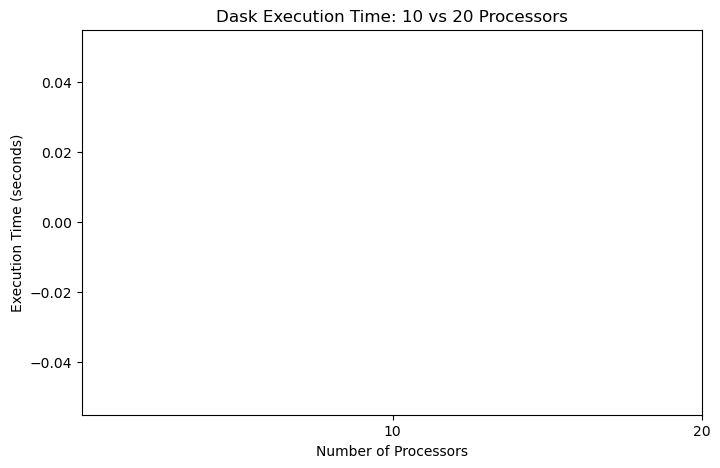

In [166]:
#Compare Execution Time
plt.figure(figsize=(8, 5))
plt.bar(n_processors_time.keys(), n_processors_time.values(), color=['green', 'purple'])
plt.xlabel("Number of Processors")
plt.ylabel("Execution Time (seconds)")
plt.title("Dask Execution Time: 10 vs 20 Processors")
plt.xticks(n_processors)
plt.show()

**####QUESTION 1.d**


In [169]:
# Simulating Travel Frequency Based on Trip Length
trip_lengths = df1.iloc[:, 9:19].mean().values  
mu = np.mean(trip_lengths)  

if mu > 100:  # Avoid too large values
    mu = 100  

poisson_model = stats.poisson(mu)
simulated_trips = poisson_model.rvs(size=1000)  # Generate Poisson samples
print("Simulated trip frequencies:\n", simulated_trips[:10])


Simulated trip frequencies:
 [ 88 105  99  85 110 104  87  87  99 105]


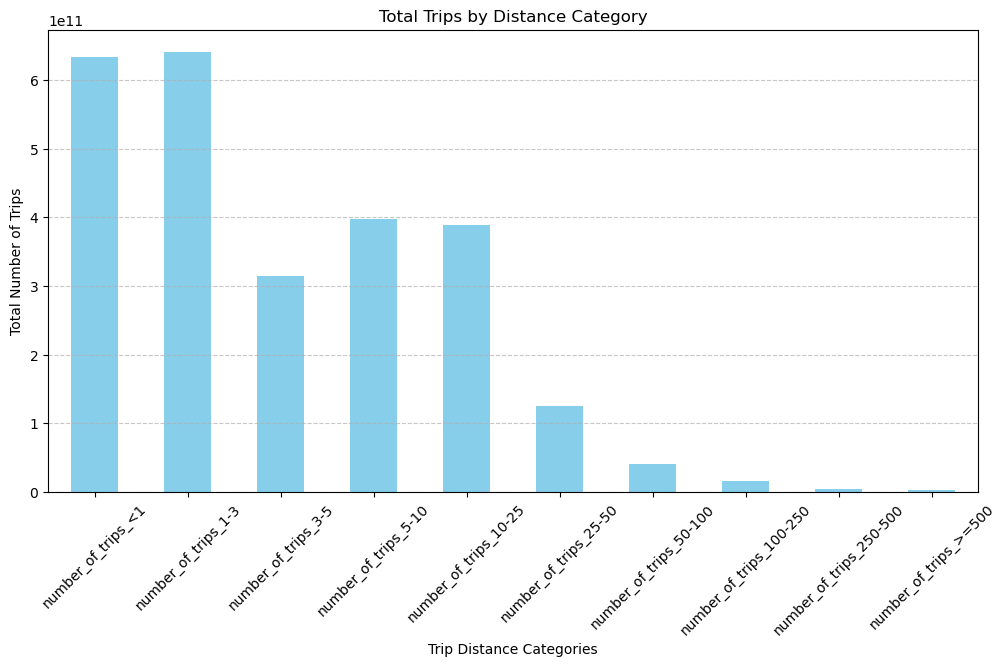

In [171]:
# Plot total trips by distance category
plt.figure(figsize=(12, 6))
total_trips.plot(kind='bar', color='skyblue')
plt.xlabel("Trip Distance Categories")
plt.ylabel("Total Number of Trips")
plt.title("Total Trips by Distance Category")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [173]:
# Calculate statistics
mean_trips = np.mean(simulated_trips)
std_dev = np.std(simulated_trips)
min_trips = np.min(simulated_trips)
max_trips = np.max(simulated_trips)
 
print(f"Mean Trips per Day: {mean_trips:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"Minimum Trips Observed: {min_trips}")
print(f"Maximum Trips Observed: {max_trips}") 

Mean Trips per Day: 100.04
Standard Deviation: 9.65
Minimum Trips Observed: 68
Maximum Trips Observed: 128


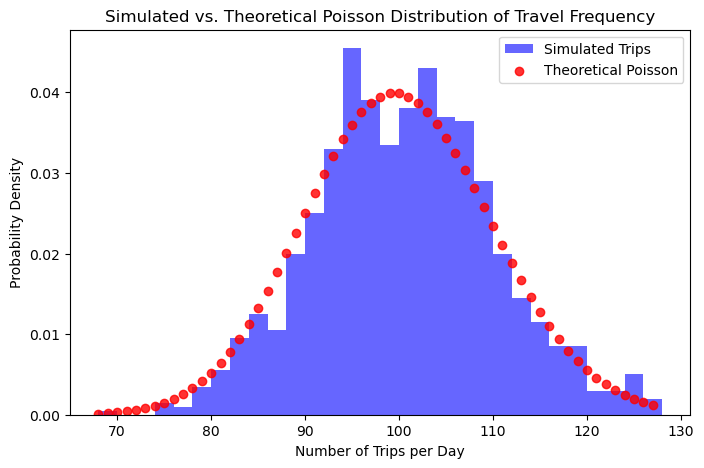

In [175]:
# Plot histogram with Poisson distribution overlay
plt.figure(figsize=(8, 5))
plt.hist(simulated_trips, bins=30, density=True, alpha=0.6, color='blue', label="Simulated Trips")

# Theoretical Poisson distribution
x = np.arange(min_trips, max_trips)
poisson_probs = poisson_model.pmf(x)
plt.scatter(x, poisson_probs, color='red', label="Theoretical Poisson", alpha=0.8)

plt.xlabel("Number of Trips per Day")
plt.ylabel("Probability Density")
plt.title("Simulated vs. Theoretical Poisson Distribution of Travel Frequency")
plt.legend()
plt.show()

In [177]:
# We can't merged both datasets  directly, as second dataset(df2)  is too small

In [179]:
df1_selected = df1[['date', 'number_of_trips_5-10', 'number_of_trips_10-25']]
df2_selected = df2[['date', 'trips_1-25_miles', 'trips_25-100_miles']]

In [181]:
df1_aggregated = df1_selected.groupby('date').sum().reset_index()
df1_aggregated

,date,number_of_trips_5-10,number_of_trips_10-25
0,2019-01-01,389008778.0,350710314.0
1,2019-01-02,514907497.0,502234086.0
2,2019-01-03,527320887.0,516078313.0
3,2019-01-04,543968920.0,528429562.0
4,2019-01-05,542819222.0,495714599.0
...,...,...,...
898,2021-06-17,604595588.0,569505041.0
899,2021-06-18,619345208.0,581081145.0
900,2021-06-19,559407003.0,513495010.0
901,2021-06-20,5755854.0,5236976.0


In [183]:
df_merged = df1_aggregated.merge(df2_selected, on="date", how="inner")
df_merged

,date,number_of_trips_5-10,number_of_trips_10-25,trips_1-25_miles,trips_25-100_miles
0,2019-08-04,648345561.0,602749237.0,934957837,79429125
1,2019-08-05,693123104.0,686409470.0,996863262,86004297
2,2019-08-06,699726192.0,706845066.0,1014614495,87599579
3,2019-08-07,731595124.0,749946226.0,1084498325,92200386
4,2019-08-08,692784821.0,678151818.0,984193010,84193587
5,2019-08-09,726065657.0,736699650.0,1052793819,95005653
6,2019-08-10,710551154.0,691719111.0,1040967509,91829556


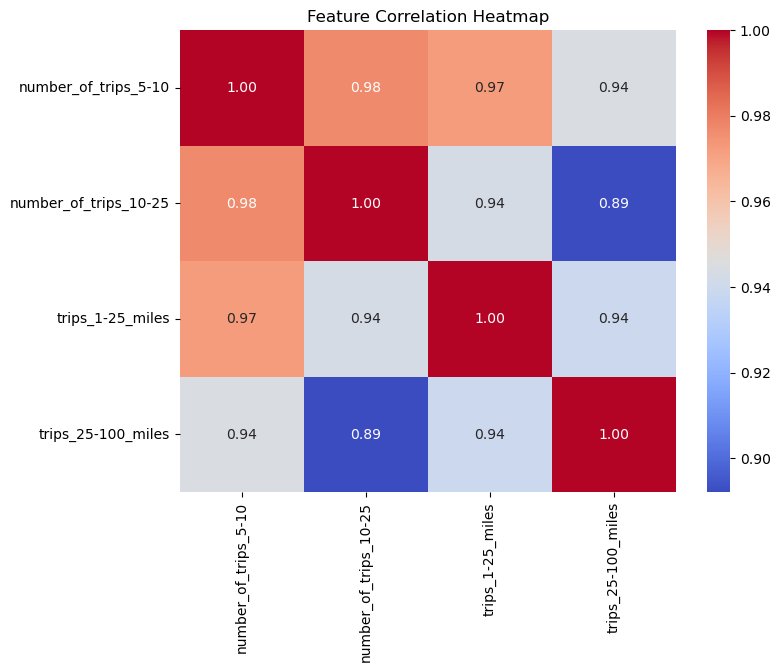

In [185]:
# Correlation analysis
plt.figure(figsize=(8, 6))
sns.heatmap(df_merged.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show() 

In [187]:
# Define X (independent variable) and Y (dependent variable)
X = df_merged[['number_of_trips_5-10']]
y = df_merged['trips_1-25_miles'] 

In [189]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [191]:
# ========== Linear Regression ==========
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_linear = lin_reg.predict(X_test)

In [193]:
# ========== Polynomial Regression (degree=2) ==========
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)
y_pred_poly = poly_reg.predict(X_poly_test)

In [195]:
# ========== Random Forest Regression ==========
rf_reg = RandomForestRegressor(n_estimators=5, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

In [197]:
# Model Evaluation
def evaluate_model(name, y_test, y_pred):
    print(f"{name} Performance:")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("R2 Score:", r2_score(y_test, y_pred))
    print("-" * 30)

evaluate_model("Linear Regression", y_test, y_pred_linear)
evaluate_model("Polynomial Regression", y_test, y_pred_poly)
evaluate_model("Random Forest Regression", y_test, y_pred_rf)
# low accurary  because data is too less

Linear Regression Performance:
MAE: 21961730.55199182
R2 Score: 0.13941005919181504
------------------------------
Polynomial Regression Performance:
MAE: 70317607.87451458
R2 Score: -8.320623827764146
------------------------------
Random Forest Regression Performance:
MAE: 30952712.5
R2 Score: -0.6197236280132745
------------------------------


**#####QUESTION 1.e**

In [200]:
# Selecting columns for visualization
distance_trip_columns = ['trips_1-25_miles', 'trips_25-100_miles']
df_vis = df2[distance_trip_columns].sum()
df_vis

trips_1-25_miles      7108888257
trips_25-100_miles     616262183
dtype: int64

C:\Users\kalkat\AppData\Local\Temp\ipykernel_11032\1998243950.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_vis.index, y=df_vis.values, palette="viridis")


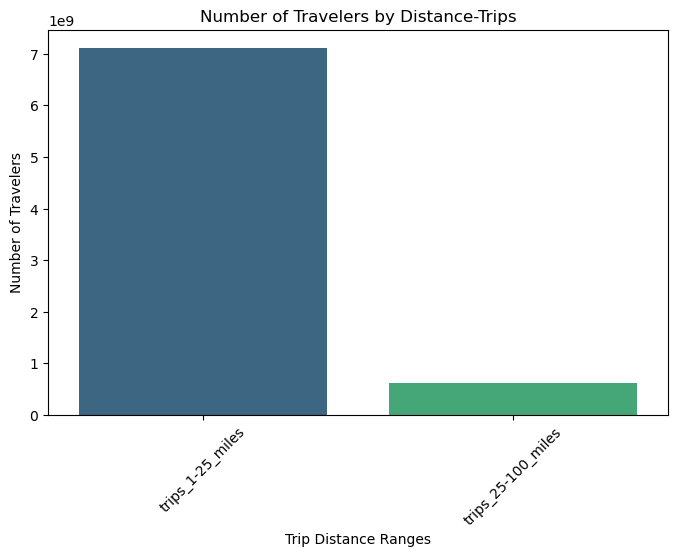

In [206]:
# Plot Bar Chart
plt.figure(figsize=(8, 5))
sns.barplot(x=df_vis.index, y=df_vis.values, palette="viridis")
plt.xlabel("Trip Distance Ranges")
plt.ylabel("Number of Travelers")
plt.title("Number of Travelers by Distance-Trips")
plt.xticks(rotation=45)
plt.show()

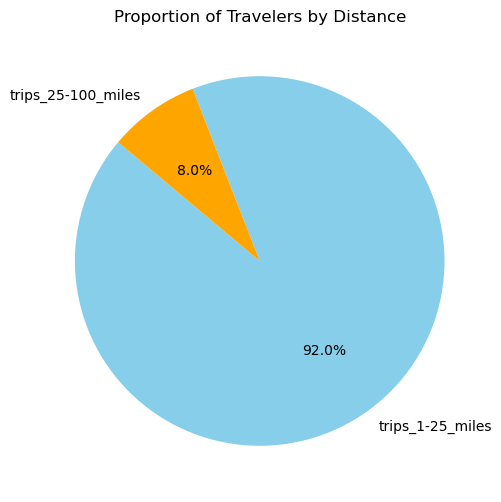

In [204]:
# Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(df_vis.values, labels=df_vis.index, autopct="%1.1f%%", colors=["skyblue", "orange"], startangle=140)
plt.title("Proportion of Travelers by Distance")
plt.show()

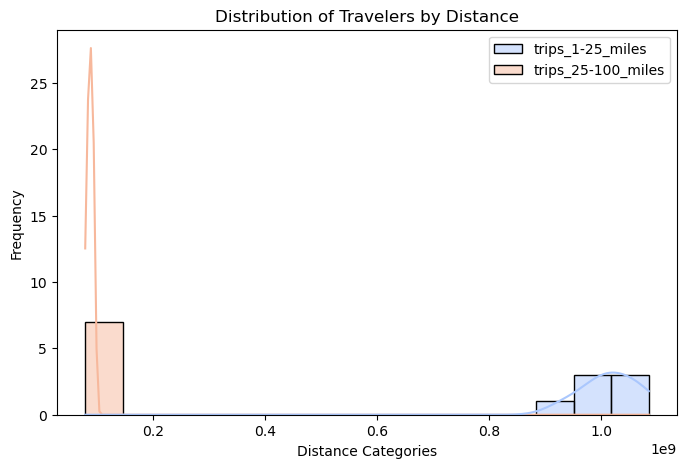

In [208]:
# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df2[distance_trip_columns], kde=True, bins=15, palette="coolwarm")
plt.xlabel("Distance Categories")
plt.ylabel("Frequency")
plt.title("Distribution of Travelers by Distance")
plt.show()


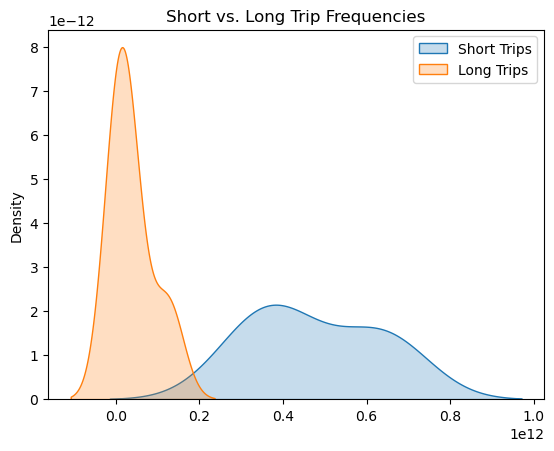

In [210]:
short_trips = df1.iloc[:, 9:14].sum().values  # short trip columns
long_trips = df1.iloc[:, 14:19].sum().values  # long trip columns

# Compare short vs. long trip distributions
sns.kdeplot(short_trips, label="Short Trips", fill=True)
sns.kdeplot(long_trips, label="Long Trips", fill=True)
plt.legend()
plt.title("Short vs. Long Trip Frequencies")
plt.show()